<a href="https://colab.research.google.com/github/AlHasSaN0ALi/Project-Phase-3---DSAI-305/blob/main/EDA_FeatureEngineering_Alhassan_DASI_305_Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **Load Data**

In [2]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **EDA and Data Cleaning**

In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

print("Missing values:\n", df.isnull().sum())

Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


<ipython-input-4-6021b2b31b2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


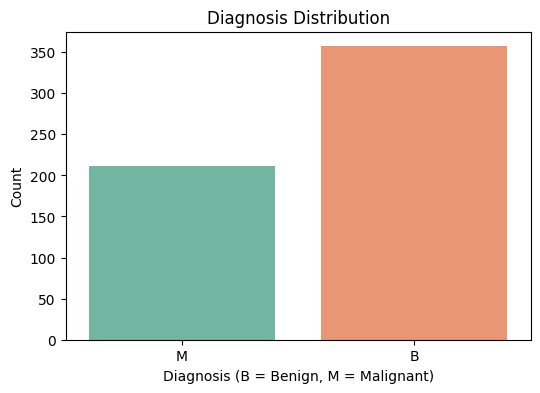

diagnosis
B    357
M    212
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()

print(df['diagnosis'].value_counts())

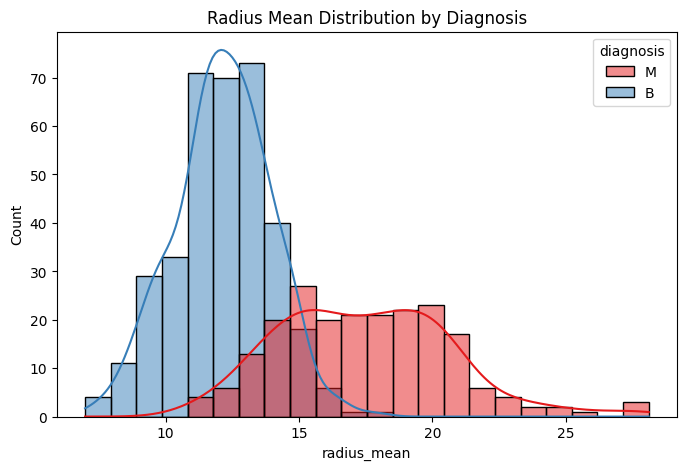

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1')
plt.title('Radius Mean Distribution by Diagnosis')
plt.show()

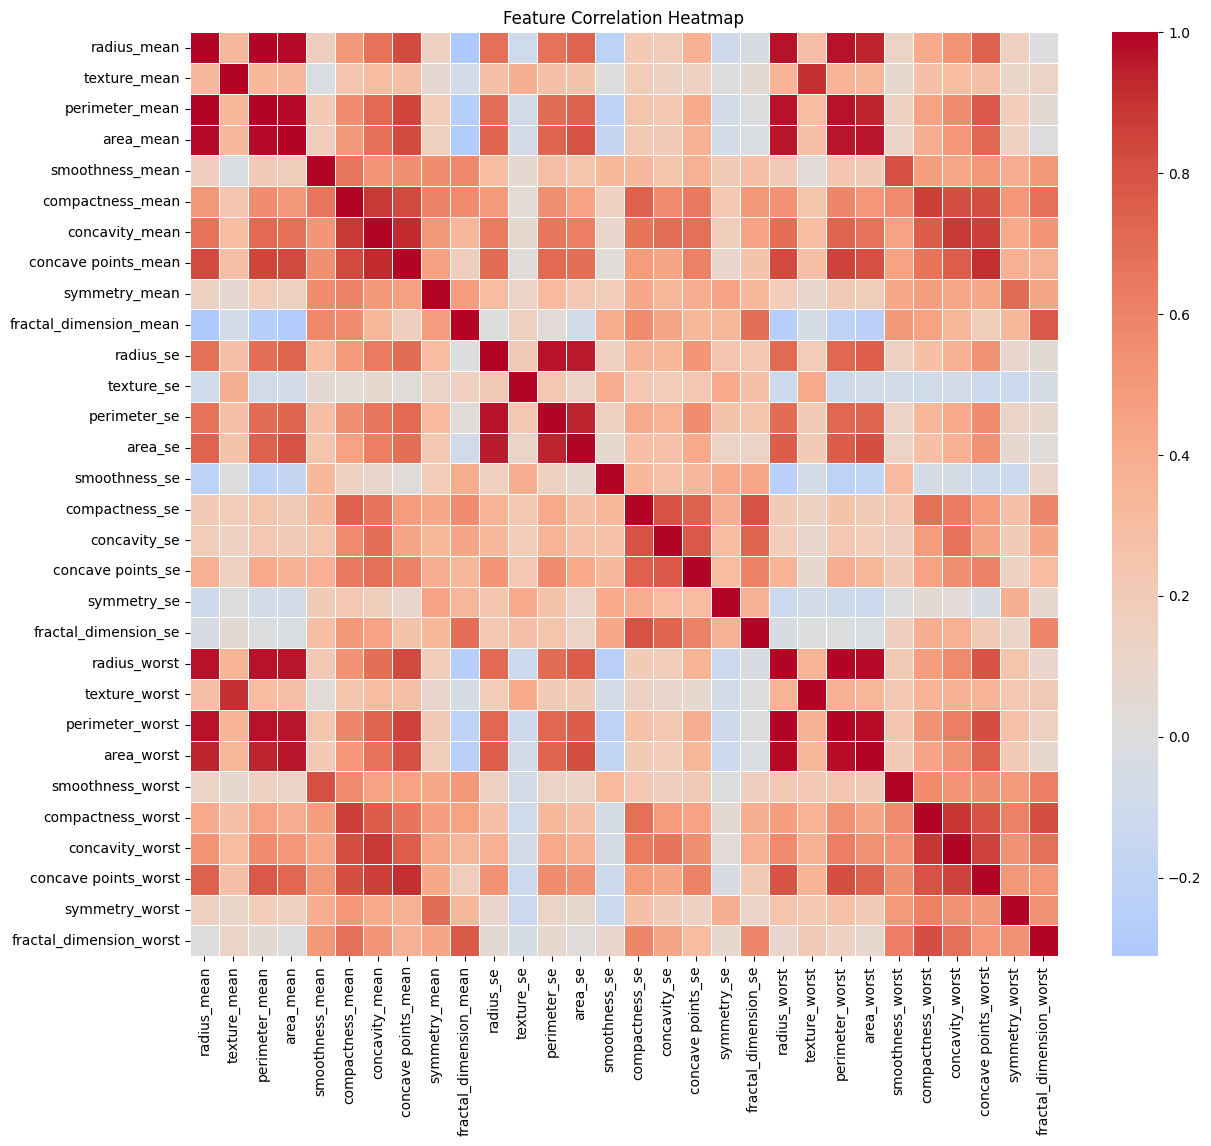

In [6]:
corr = df.drop(columns='diagnosis').corr()


plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
<ipython-input-7-7b78aa919d33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

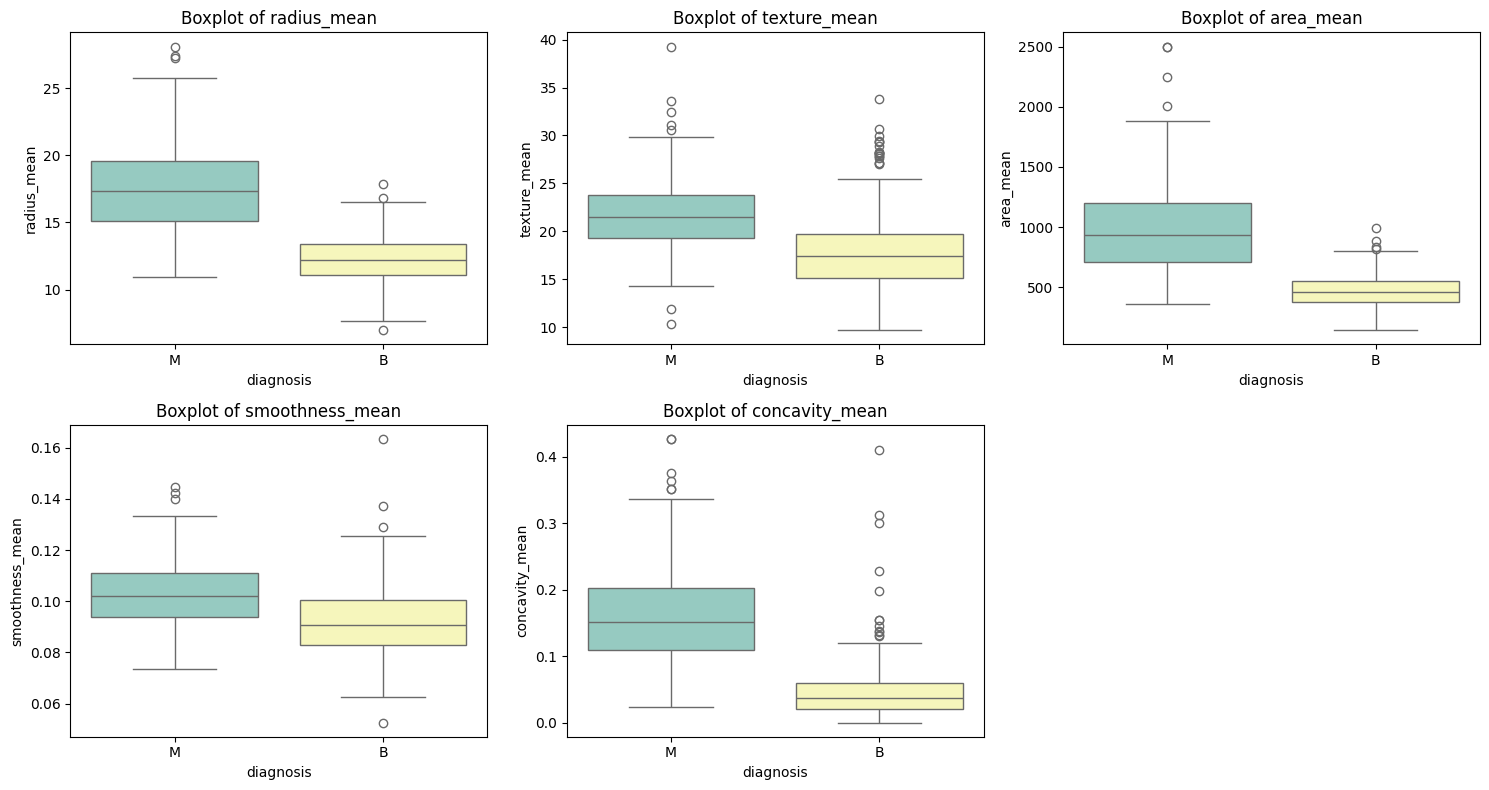

In [7]:
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set3')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

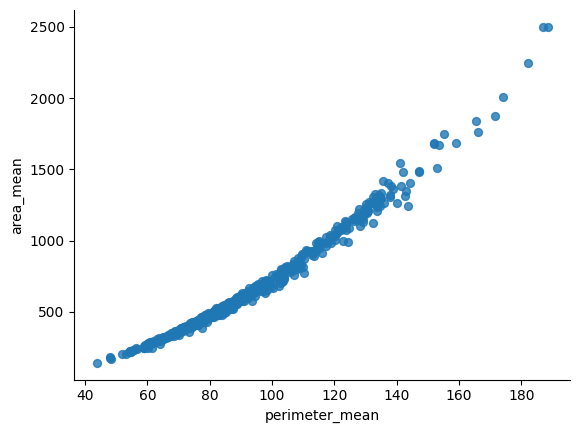

In [8]:
df.plot(kind='scatter', x='perimeter_mean', y='area_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

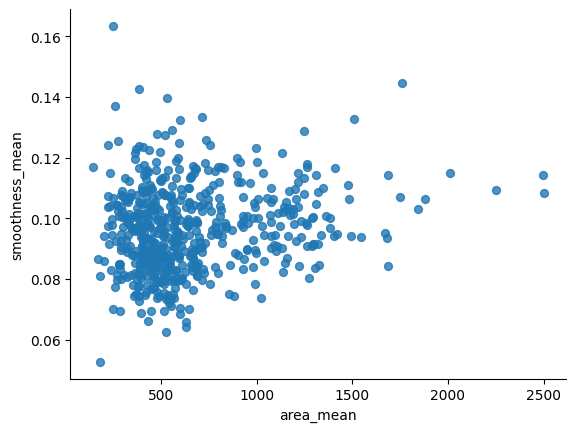

In [9]:
df.plot(kind='scatter', x='area_mean', y='smoothness_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

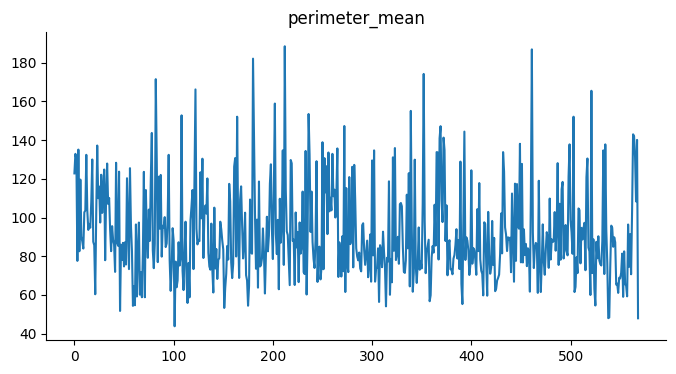

In [10]:
df['perimeter_mean'].plot(kind='line', figsize=(8, 4), title='perimeter_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-11-6e32c64a8899>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

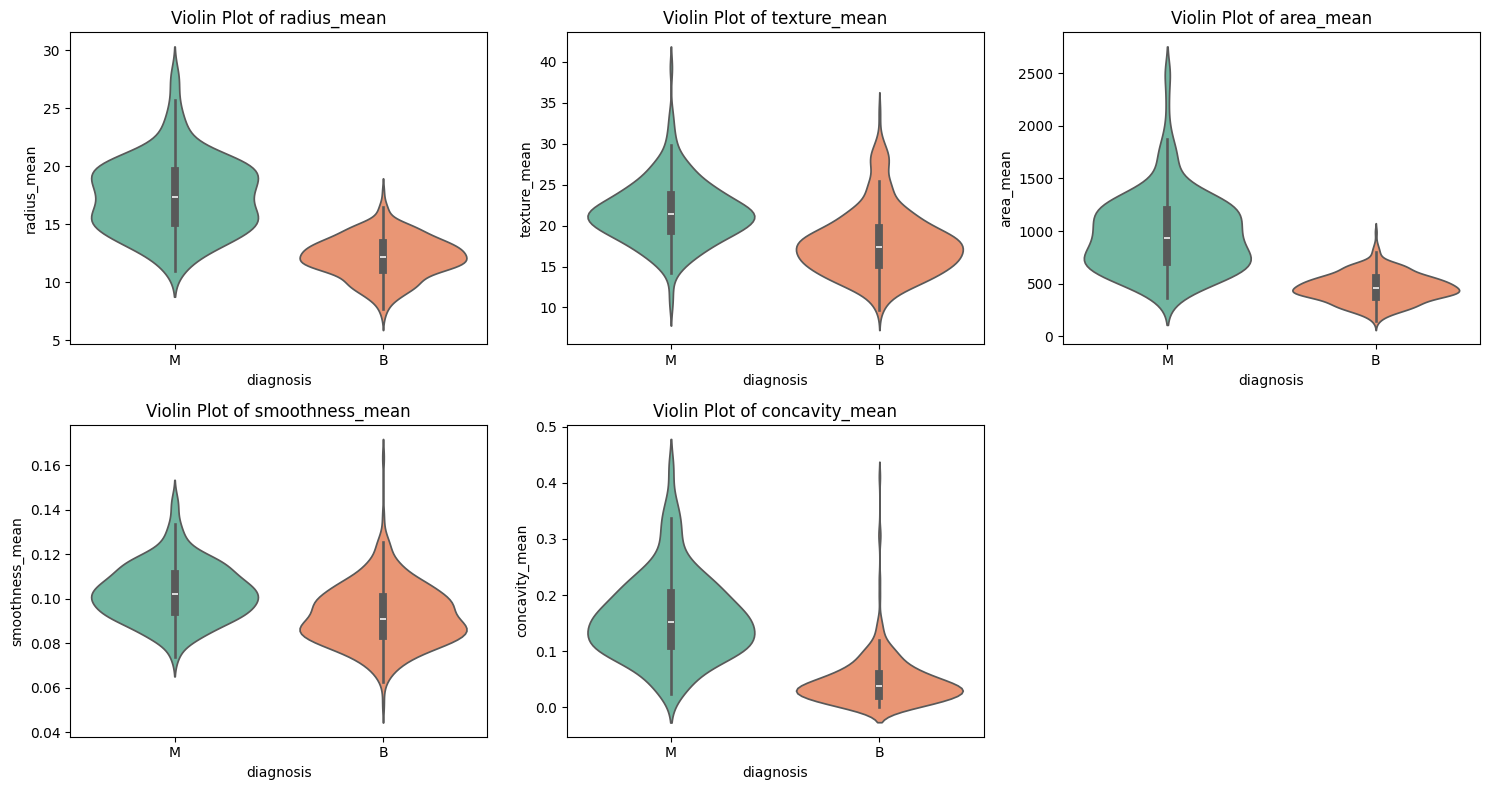

In [11]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()

In [29]:
l = LabelEncoder()
df['diagnosis'] = l.fit_transform(df['diagnosis'])

# **Feature Engineering and feature seclection**

In [30]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [31]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [32]:
chi2_scores = SelectKBest(score_func=chi2, k='all').fit(X_scaled, y).scores_
anova_scores = SelectKBest(score_func=f_classif, k='all').fit(X_scaled, y).scores_
info_gain_scores = SelectKBest(score_func=mutual_info_classif, k='all').fit(X_scaled, y).scores_

In [33]:
print("Chi2 Scores:", chi2_scores)
print("ANOVA F-Value Scores:", anova_scores)
print("Information Gain Scores:", info_gain_scores)

Chi2 Scores: [2.48972929e+01 6.39407141e+00 2.65289023e+01 2.93285938e+01
 2.98190040e+00 2.03531759e+01 4.61863954e+01 5.24057427e+01
 3.13313039e+00 7.65553154e-03 1.73241278e+01 3.07449233e-03
 1.60443442e+01 1.96769750e+01 1.46728955e-01 5.05676231e+00
 2.63817579e+00 5.78199590e+00 1.83480200e-03 2.88033633e-01
 3.41249366e+01 8.74162754e+00 3.44380907e+01 3.50438820e+01
 5.67573303e+00 2.09925414e+01 3.15630312e+01 4.63416477e+01
 5.56009310e+00 4.41012524e+00]
ANOVA F-Value Scores: [6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.33793126e+02 8.61676020e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.36691939e+02 9.64385393e+02
 1.18860232e+02 6.64439606e+01]
Information Gain Scores: [0.37031995 0.09509917

In [35]:
feature_names = X.columns

In [34]:
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_scores,
    "ANOVA F-Value": anova_scores,
    "Information Gain": info_gain_scores
})

In [36]:
print("\nTop 20 Features by Chi2 Score:")
print(feature_scores.sort_values(by='Chi2 Score', ascending=False).head(20)[['Feature', 'Chi2 Score']])


Top 20 Features by Chi2 Score:
                 Feature  Chi2 Score
7    concave points_mean   52.405743
27  concave points_worst   46.341648
6         concavity_mean   46.186395
23            area_worst   35.043882
22       perimeter_worst   34.438091
20          radius_worst   34.124937
26       concavity_worst   31.563031
3              area_mean   29.328594
2         perimeter_mean   26.528902
0            radius_mean   24.897293
25     compactness_worst   20.992541
5       compactness_mean   20.353176
13               area_se   19.676975
10             radius_se   17.324128
12          perimeter_se   16.044344
21         texture_worst    8.741628
1           texture_mean    6.394071
17     concave points_se    5.781996
24      smoothness_worst    5.675733
28        symmetry_worst    5.560093


In [37]:
print("\nTop 20 Features by ANOVA F-Value:")
print(feature_scores.sort_values(by='ANOVA F-Value', ascending=False).head(20)[['Feature', 'ANOVA F-Value']])


Top 20 Features by ANOVA F-Value:
                 Feature  ANOVA F-Value
27  concave points_worst     964.385393
22       perimeter_worst     897.944219
7    concave points_mean     861.676020
20          radius_worst     860.781707
2         perimeter_mean     697.235272
23            area_worst     661.600206
0            radius_mean     646.981021
3              area_mean     573.060747
6         concavity_mean     533.793126
26       concavity_worst     436.691939
5       compactness_mean     313.233079
25     compactness_worst     304.341063
10             radius_se     268.840327
12          perimeter_se     253.897392
13               area_se     243.651586
21         texture_worst     149.596905
24      smoothness_worst     122.472880
28        symmetry_worst     118.860232
1           texture_mean     118.096059
17     concave points_se     113.262760


In [38]:
print("\nTop 20 Features by Information Gain:")
print(feature_scores.sort_values(by='Information Gain', ascending=False).head(20)[['Feature', 'Information Gain']])


Top 20 Features by Information Gain:
                 Feature  Information Gain
22       perimeter_worst          0.476766
23            area_worst          0.464313
20          radius_worst          0.455452
7    concave points_mean          0.439695
27  concave points_worst          0.436868
2         perimeter_mean          0.402579
6         concavity_mean          0.373559
0            radius_mean          0.370320
3              area_mean          0.357304
13               area_se          0.340272
26       concavity_worst          0.315106
12          perimeter_se          0.273638
10             radius_se          0.247364
25     compactness_worst          0.225710
5       compactness_mean          0.212611
17     concave points_se          0.127520
21         texture_worst          0.117921
16          concavity_se          0.115956
24      smoothness_worst          0.099356
1           texture_mean          0.095099


In [39]:
plt.style.use('ggplot')

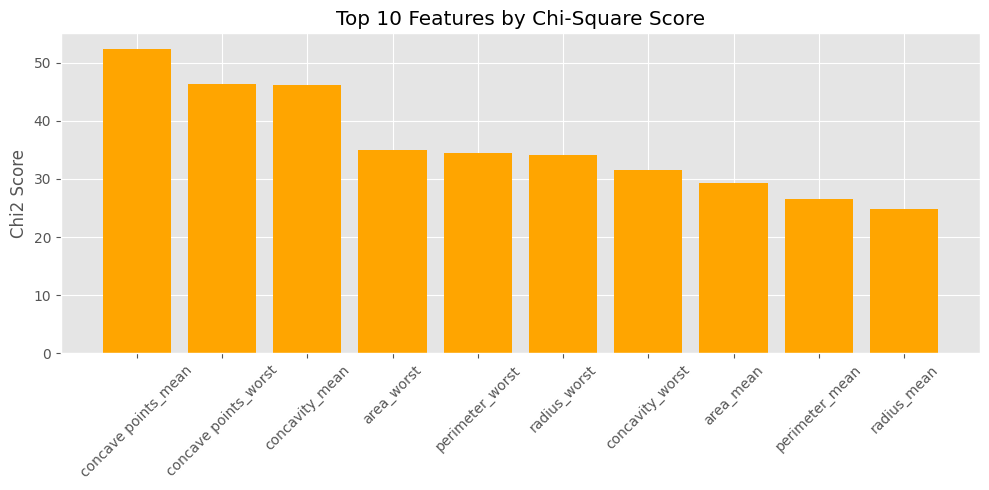

In [41]:
# Plot Chi2 Scores
top_chi2_df = feature_scores.sort_values(by='Chi2 Score', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_chi2_df['Feature'], top_chi2_df['Chi2 Score'], color='orange')
plt.title('Top 10 Features by Chi-Square Score')
plt.ylabel('Chi2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

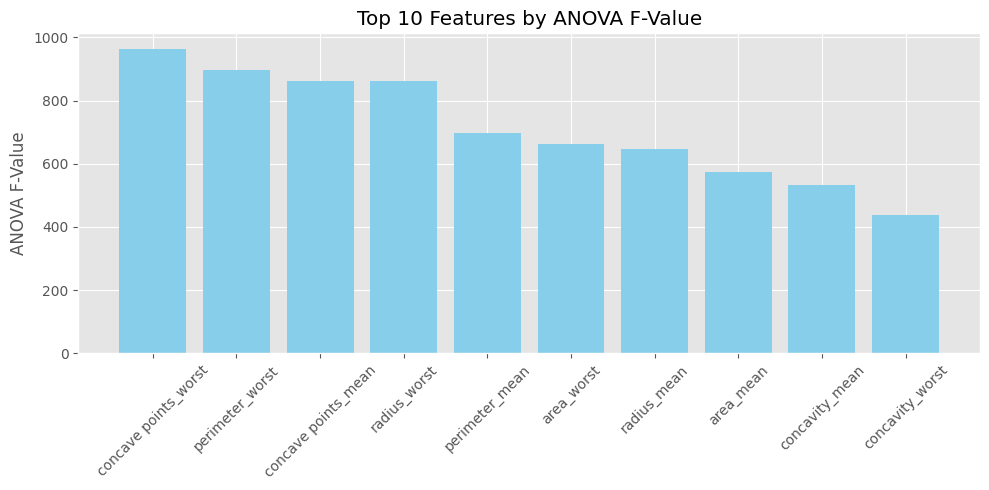

In [43]:
# Plot ANOVA F-Value Scores
top_anova_df = feature_scores.sort_values(by='ANOVA F-Value', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_anova_df['Feature'], top_anova_df['ANOVA F-Value'], color='skyblue')
plt.title('Top 10 Features by ANOVA F-Value')
plt.ylabel('ANOVA F-Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

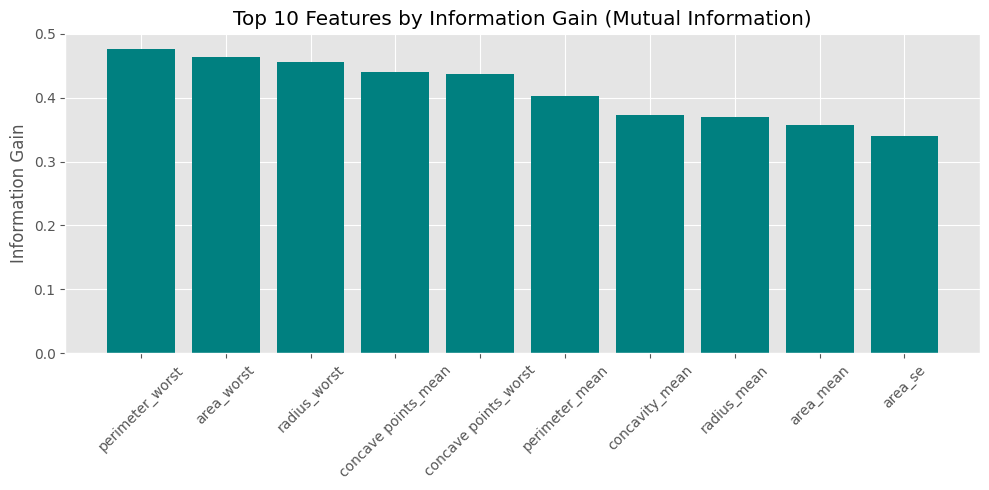

In [45]:
# Plot Information Gain Scores
top_info_gain_df = feature_scores.sort_values(by='Information Gain', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_info_gain_df['Feature'], top_info_gain_df['Information Gain'], color='teal')
plt.title('Top 10 Features by Information Gain (Mutual Information)')
plt.ylabel('Information Gain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
X["radius_ratio"] = X["radius_worst"] / (X["radius_mean"] + 1e-6)
X["area_ratio"] = X["area_worst"] / (X["area_mean"] + 1e-6)
X["concavity_product"] = X["concavity_mean"] * X["concave points_mean"]

In [49]:
engineered = pd.DataFrame({
    "Feature": ["radius_ratio", "area_ratio", "concavity_product"],
    "Chi2 Score": [None]*3,
    "ANOVA F-Value": [None]*3,
    "Information Gain": [None]*3
})

In [50]:
feature_scores = pd.concat([feature_scores, engineered], ignore_index=True)

<ipython-input-50-6f23b00b630c>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_scores = pd.concat([feature_scores, engineered], ignore_index=True)


In [51]:
scored_features = feature_scores.dropna().copy()
scored_features["Chi2_Norm"] = scored_features["Chi2 Score"] / scored_features["Chi2 Score"].max()
scored_features["ANOVA_Norm"] = scored_features["ANOVA F-Value"] / scored_features["ANOVA F-Value"].max()
scored_features["InfoGain_Norm"] = scored_features["Information Gain"] / scored_features["Information Gain"].max()
scored_features["Average_Score"] = scored_features[["Chi2_Norm", "ANOVA_Norm", "InfoGain_Norm"]].mean(axis=1)

In [68]:
top_features = scored_features.sort_values(by="Average_Score", ascending=False).head(20)["Feature"].tolist()
top_features += ["radius_ratio", "area_ratio", "concavity_product"]

X_filtered = X[top_features]
data_filtered = pd.concat([X_filtered, y], axis=1)

In [69]:
def remove_outliers_iqr(df, features, factor=1.5):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

clean_df = remove_outliers_iqr(data_filtered, top_features)

In [71]:
clean_df.to_csv("cl_data.csv", index=False)

In [54]:
df = pd.read_csv("cl_data.csv")
df

,concave points_mean,concave points_worst,perimeter_worst,radius_worst,area_worst,concavity_mean,perimeter_mean,radius_mean,area_mean,concavity_worst,...,radius_se,texture_worst,concave points_se,texture_mean,smoothness_worst,symmetry_worst,radius_ratio,area_ratio,concavity_product,diagnosis
0,0.14710,0.2654,184.60,25.380,2019.0,0.30010,122.80,17.99,1001.0,0.7119,...,1.0950,17.33,0.01587,10.38,0.16220,0.4601,1.410784,2.016983,0.044145,1
1,0.07017,0.1860,158.80,24.990,1956.0,0.08690,132.90,20.57,1326.0,0.2416,...,0.5435,23.41,0.01340,17.77,0.12380,0.2750,1.214876,1.475113,0.006098,1
2,0.12790,0.2430,152.50,23.570,1709.0,0.19740,130.00,19.69,1203.0,0.4504,...,0.7456,25.53,0.02058,21.25,0.14440,0.3613,1.197054,1.420615,0.025247,1
3,0.10520,0.2575,98.87,14.910,567.7,0.24140,77.58,11.42,386.1,0.6869,...,0.4956,26.50,0.01867,20.38,0.20980,0.6638,1.305604,1.470344,0.025395,1
4,0.10430,0.1625,152.20,22.540,1575.0,0.19800,135.10,20.29,1297.0,0.4000,...,0.7572,16.67,0.01885,14.34,0.13740,0.2364,1.110892,1.214341,0.020651,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.13890,0.2216,166.10,25.450,2027.0,0.24390,142.00,21.56,1479.0,0.4107,...,1.1760,26.40,0.02454,22.39,0.14100,0.2060,1.180427,1.370521,0.033878,1
565,0.09791,0.1628,155.00,23.690,1731.0,0.14400,131.20,20.13,1261.0,0.3215,...,0.7655,38.25,0.01678,28.25,0.11660,0.2572,1.176850,1.372720,0.014099,1
566,0.05302,0.1418,126.70,18.980,1124.0,0.09251,108.30,16.60,858.1,0.3403,...,0.4564,34.12,0.01557,28.08,0.11390,0.2218,1.143373,1.309871,0.004905,1
567,0.15200,0.2650,184.60,25.740,1821.0,0.35140,140.10,20.60,1265.0,0.9387,...,0.7260,39.42,0.01664,29.33,0.16500,0.4087,1.249515,1.439526,0.053413,1
